<a href="https://colab.research.google.com/github/roshisaxena/confidence_interval/blob/main/Confidence_interval_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Buisness Problem

# An American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United
# States. Retail Corporation has more than 100 million customers worldwide.

# The Management team at Retail Corporation wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender
# and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female
# customers: Do women spend more on Black Friday than men? (Let us assume 50 million customers are male and 50 million are female).

# Following are the attributes of the dataset.
# 1. UserId : Id of the User making a purchase
# 2. ProductId : Id of the product which is being purchased
# 3. Gender : Gender of the User
# 4. Age : Age is given in brackets
# 5. Occupation : is presented in masked form
# 6. City_Category : Three categories are given
# 7. StayinCurrentcityYears : Number of years stay in current city
# 8. Marital_status : Marital status of the user
# 9. Product_category : presented in masked form
# 10. Purchase : How much purchase amount


In [ ]:
# Defining Problem Statement and Analyzing Basic Metrics

# Problem Statement:

# Customer Purchase Behaviour during Black Friday Sale based on Gender, Age and Marital Status

In [ ]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm



In [ ]:
# Reading data from file
df = pd.read_csv("walmart_data.csv")

In [ ]:
# Checking the basic structure of dataframe
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
# Checking how many rows and columns are there in dataframe
df.shape

(550068, 10)

In [ ]:
# Checking the data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# Statistical Summary

df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
# Statiscal summary including the Object data type

df.describe(include = "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
# Checking the number of unique users which made the purchase

df["User_ID"].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
# Checking the number of unique product_ids which were purchased during Black Friday sale

df["Product_ID"].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [ ]:
# Checking the unique gender

df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
# Checking how many age groups are there
df["Age"].nunique()

7

In [ ]:
# Checking the count of Age Bracket

df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
# Checking the Occupation

df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
# Checking the Marital Status:

df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
# Checking the number of total purchases

df["Purchase"].nunique()

18105

In [ ]:
# Checking the Purchase Status

df["Purchase"].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [ ]:
# Which user made the highest purchase

df.groupby("User_ID")["Purchase"].sum()


User_ID
1000001     334093
1000002     810472
1000003     341635
1000004     206468
1000005     821001
            ...   
1006036    4116058
1006037    1119538
1006038      90034
1006039     590319
1006040    1653299
Name: Purchase, Length: 5891, dtype: int64

In [ ]:
# COMMENT ON THE RANGE OF ATTRIBUTES

# 1. There are 550068 rows and 10 columns
# 2. Column names are User_ID, Product_ID, Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,
#.    Marital_Status, Product_Category and Purchase.
# 3. User_id, Occupation,Marital_Status,Product_Category and Purchase are of integer data types.
# 4. Product_id,Gender,Age,City_Category,Stay_In_Current_City_Years are of String or Object data types.
# 5. Occupation and Marital_Status are given in masked form.
# 6. Statistics of the Purchase columns:
#    - Mean               :   9263.9687
#    - Standard deviation :   5023.0653
#    - Minimum value      :   12
#    - Maximum value      :   23961
# 7. There are 5891 unique User_id who did the purchase during black friday sale.
# 8. There are 3631 unique product_ids.
# 9. There are only 2 genders presents : Male and Female.
# 10. There are only two values present in Marital Status column 0 and 1. We are assuming that 0 represents unmarried, 1 represents married.
# 11. A total of 18105 purchases has been done.
# 12. Maximum amount spent in the purchase was 23961$ and minimum amount was 12$. The units of money is not mentioned , since its an American multinational
#.    organization, we are assuming the unit to be $.
# 13. There are 7 age groups who made the puchase and they are been categorized into bins . Bins are :
#.        0 -17
          18-25
          26-35
          36-45
          45-50
          50-55
          55+
# 14. Occupation is present in masked form , maximum number of people purchasing items are from with mask 4.
# 15. A total number of 18105 unique purchases have been made.

In [ ]:
# VISUAL ANALYSIS : UNIVARIATE AND BIVARIATE

# FOR CONTINUOS VARIABLES : DISTPLOT,COUNTPLOT,HISTOGRAM FOR UNIVARIATE ANALYSIS

<Axes: xlabel='Age', ylabel='Count'>

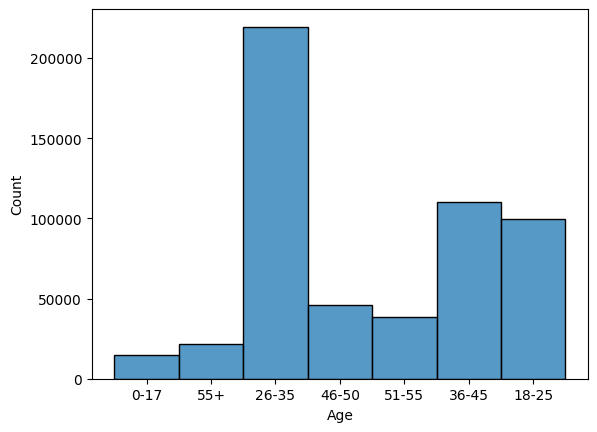

In [ ]:
# checking the distribution of age

sns.histplot(df["Age"])

<Axes: xlabel='Gender', ylabel='Count'>

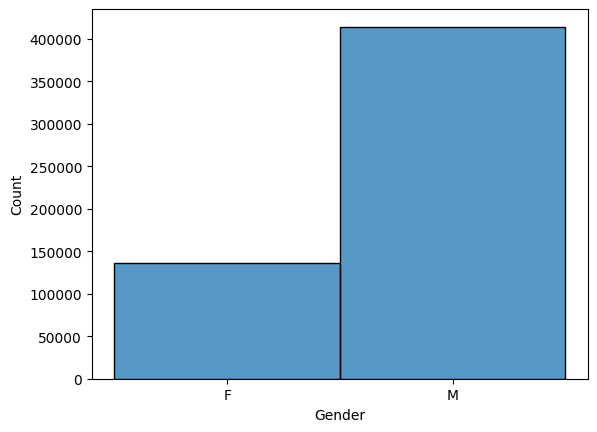

In [ ]:
# Checking the distribution of Gender

sns.histplot(df["Gender"])

<Axes: xlabel='Product_ID', ylabel='count'>

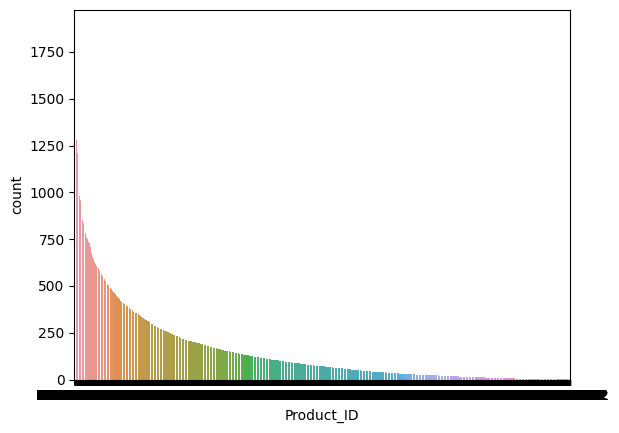

In [ ]:
# Checking the count of Product_ID

sns.countplot(data = df,
              x = "Product_ID",
              order = df["Product_ID"].value_counts().index)

<Axes: xlabel='Product_Category', ylabel='count'>

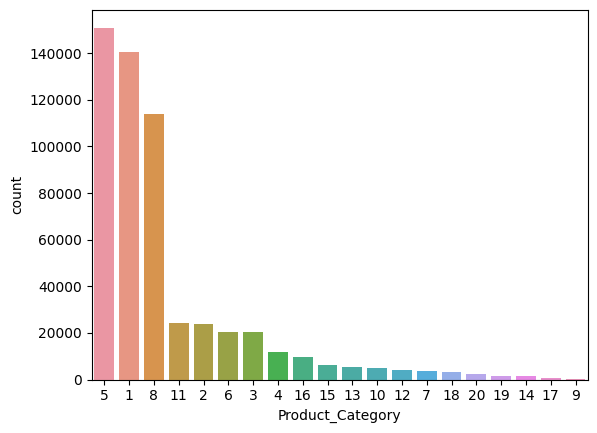

In [ ]:
# Checking the count of product categories

sns.countplot(data = df,
              x = "Product_Category",
              order = df["Product_Category"].value_counts().index)

<Axes: xlabel='Marital_Status', ylabel='count'>

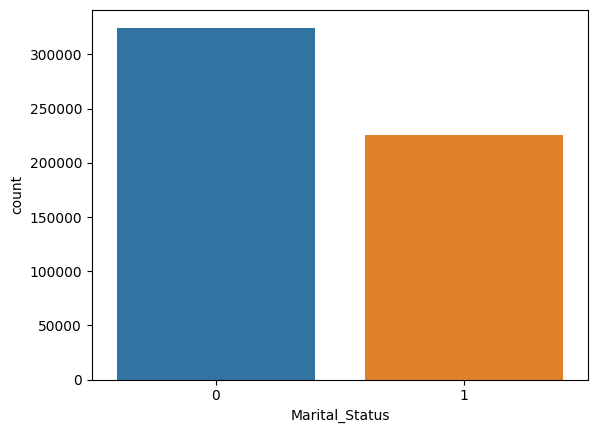

In [ ]:
# Counting Marital Status

sns.countplot(data = df,
              x = "Marital_Status",
              order = df["Marital_Status"].value_counts().index)

<Axes: xlabel='Age', ylabel='count'>

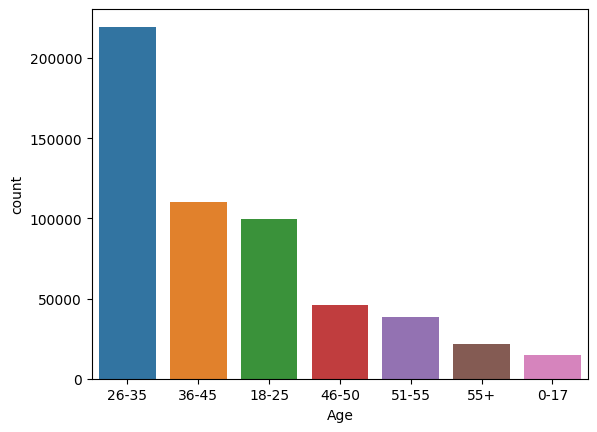

In [ ]:
# Distribution of Age

sns.countplot(data = df,
              x = "Age",
              order = df["Age"].value_counts().index)

<Axes: xlabel='City_Category', ylabel='count'>

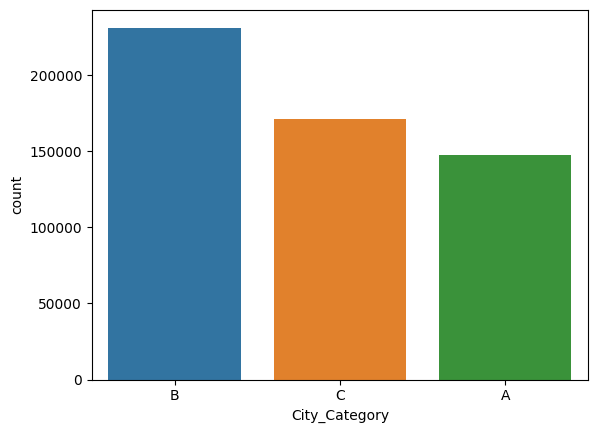

In [ ]:
# Checking the count of cities

sns.countplot(data = df,
              x = "City_Category",
              order = df["City_Category"].value_counts().index)

<Axes: xlabel='Occupation', ylabel='count'>

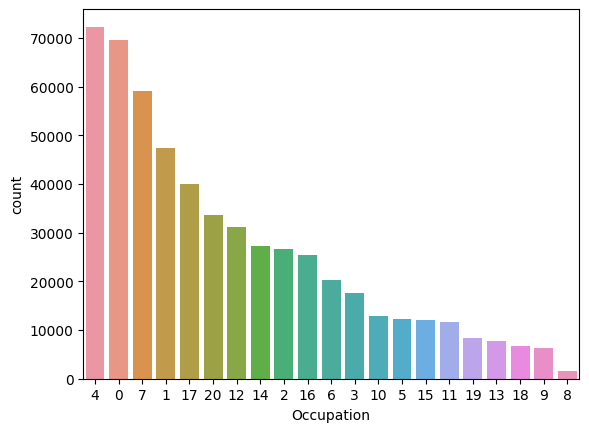

In [ ]:
# Checking the count of Occupation

sns.countplot(data = df,
              x = "Occupation",
              order = df["Occupation"].value_counts().index)

<Axes: xlabel='Age', ylabel='Purchase'>

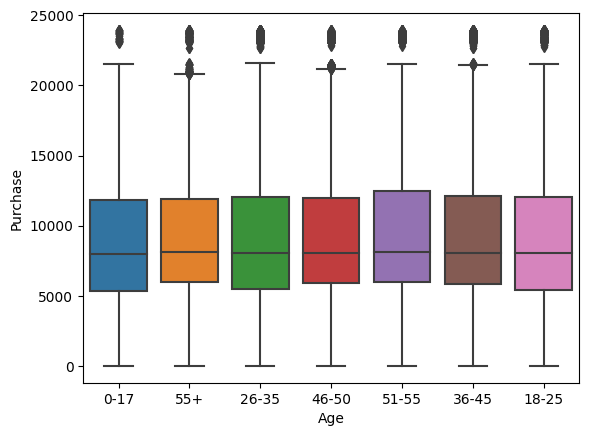

In [ ]:
# Which age group does more shopping.

sns.boxplot(data = df,
            x = "Age",
            y = "Purchase")

<Axes: xlabel='Gender', ylabel='Purchase'>

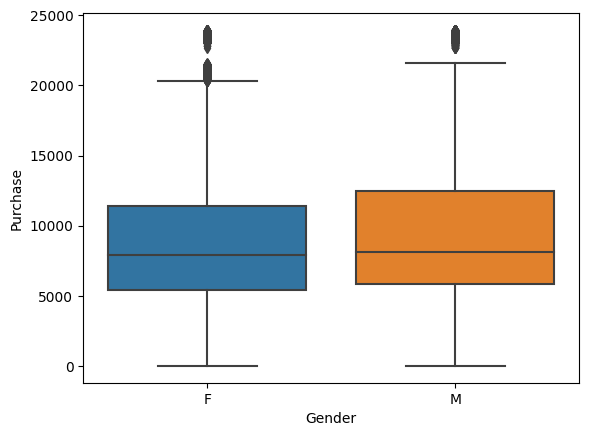

In [ ]:
# Which Gender tends to shop more on Black Friday sale.

sns.boxplot(data = df,
            x = "Gender",
            y = "Purchase")

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

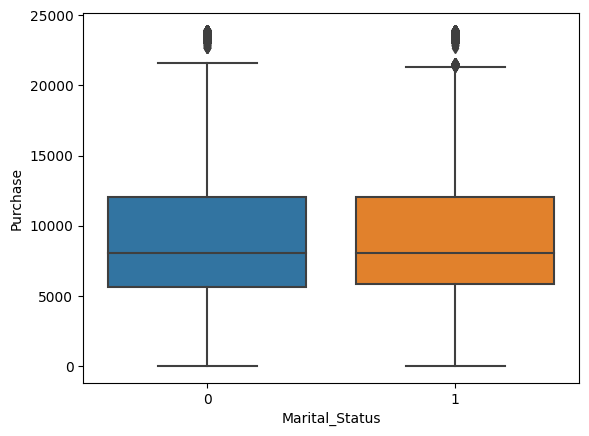

In [ ]:
# Which marital status tends to do more shopping.

sns.boxplot(data = df,
            x = "Marital_Status",
            y = "Purchase")

In [ ]:
# We can see how much is being spent by which age group.

pd.crosstab(df["Purchase"],df["Age"])

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Purchase,,,,,,,
12,3,20,29,23,12,7,7
13,3,17,50,16,10,5,5
14,2,19,33,19,7,13,2
24,5,21,46,22,9,8,7
25,5,16,34,25,12,12,9
...,...,...,...,...,...,...,...
23956,0,0,1,0,0,0,0
23958,0,2,0,0,0,1,1
23959,0,0,1,0,0,1,0


In [ ]:
# Creating bins for Purchase

df.loc[df["Purchase"].between(0,2500,"both"),"purchase-group"] = "2.5K"
df.loc[df["Purchase"].between(2501,5000,"both"),"purchase-group"] = "5K"
df.loc[df["Purchase"].between(5001,7500,"both"),"purchase-group"] = "7.5K"
df.loc[df["Purchase"].between(7501,10000,"both"),"purchase-group"] = "10K"
df.loc[df["Purchase"].between(10001,12500,"both"),"purchase-group"] = "12.5K"
df.loc[df["Purchase"].between(12501,15000,"both"),"purchase-group"] = "15K"
df.loc[df["Purchase"].between(15001,17500,"both"),"purchase-group"] = "17.5K"
df.loc[df["Purchase"].between(17501,20000,"both"),"purchase-group"] = "20K"
df.loc[df["Purchase"].between(20001,22500,"both"),"purchase-group"] = "22.5K"
df.loc[df["Purchase"].between(22501,25000,"both"),"purchase-group"] = "25K"

In [ ]:
# Contigency Table : how much is being spent by a particular age group

pd.crosstab(df["purchase-group"],df["Age"])

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
purchase-group,,,,,,,
10K,3403,22825,51225,26413,11595,10078,6361
12.5K,1601,11091,24361,12023,4767,3987,2144
15K,630,3465,7116,4007,1654,1409,672
17.5K,1577,11734,26796,13740,5412,4731,2473
2.5K,1381,6988,14027,7189,3080,2549,1630
20K,886,5936,12499,6205,2380,2318,1145
22.5K,252,1783,4179,2012,819,855,441
25K,56,262,816,546,224,278,168
5K,1797,11642,24327,10994,4551,3120,1648


In [ ]:
# We can see that frequency of spending 10K and 7.5K amount is approximately high in every age group

<Axes: xlabel='Age', ylabel='purchase-group'>

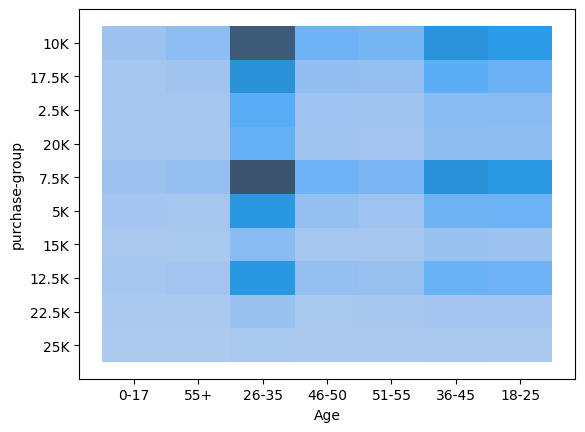

In [ ]:
# Checking the co-relation between age and purchase group

sns.histplot(x = df["Age"],
             y = df["purchase-group"])

In [ ]:
# Contigency table for Purchase group pertaining to a specific gender

pd.crosstab(df["purchase-group"],df["Gender"])

Gender,F,M
purchase-group,,
10K,35844,96056
12.5K,12622,47352
15K,4890,14063
17.5K,12877,53586
2.5K,10237,26607
20K,5730,25639
22.5K,2284,8057
25K,538,1812
5K,14002,44077


<Axes: xlabel='Gender', ylabel='purchase-group'>

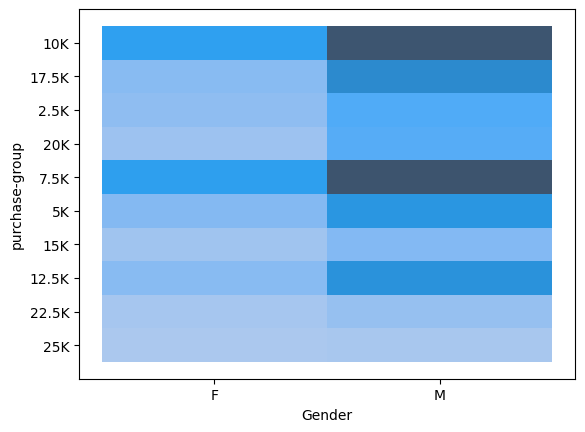

In [ ]:
# Co-Relation between gender and purchase group

sns.histplot(x = df["Gender"],
             y = df["purchase-group"])

In [ ]:
# Contigency table between purchase group specific to a particular marital status

pd.crosstab(df["purchase-group"],df["Marital_Status"])

Marital_Status,0,1
purchase-group,,
10K,76861,55039
12.5K,35533,24441
15K,11063,7890
17.5K,39491,26972
2.5K,21553,15291
20K,18717,12652
22.5K,6119,4222
25K,1303,1047
5K,34906,23173


In [ ]:
# CO-RELATION : HEATMAPS AND PAIRPLOTS

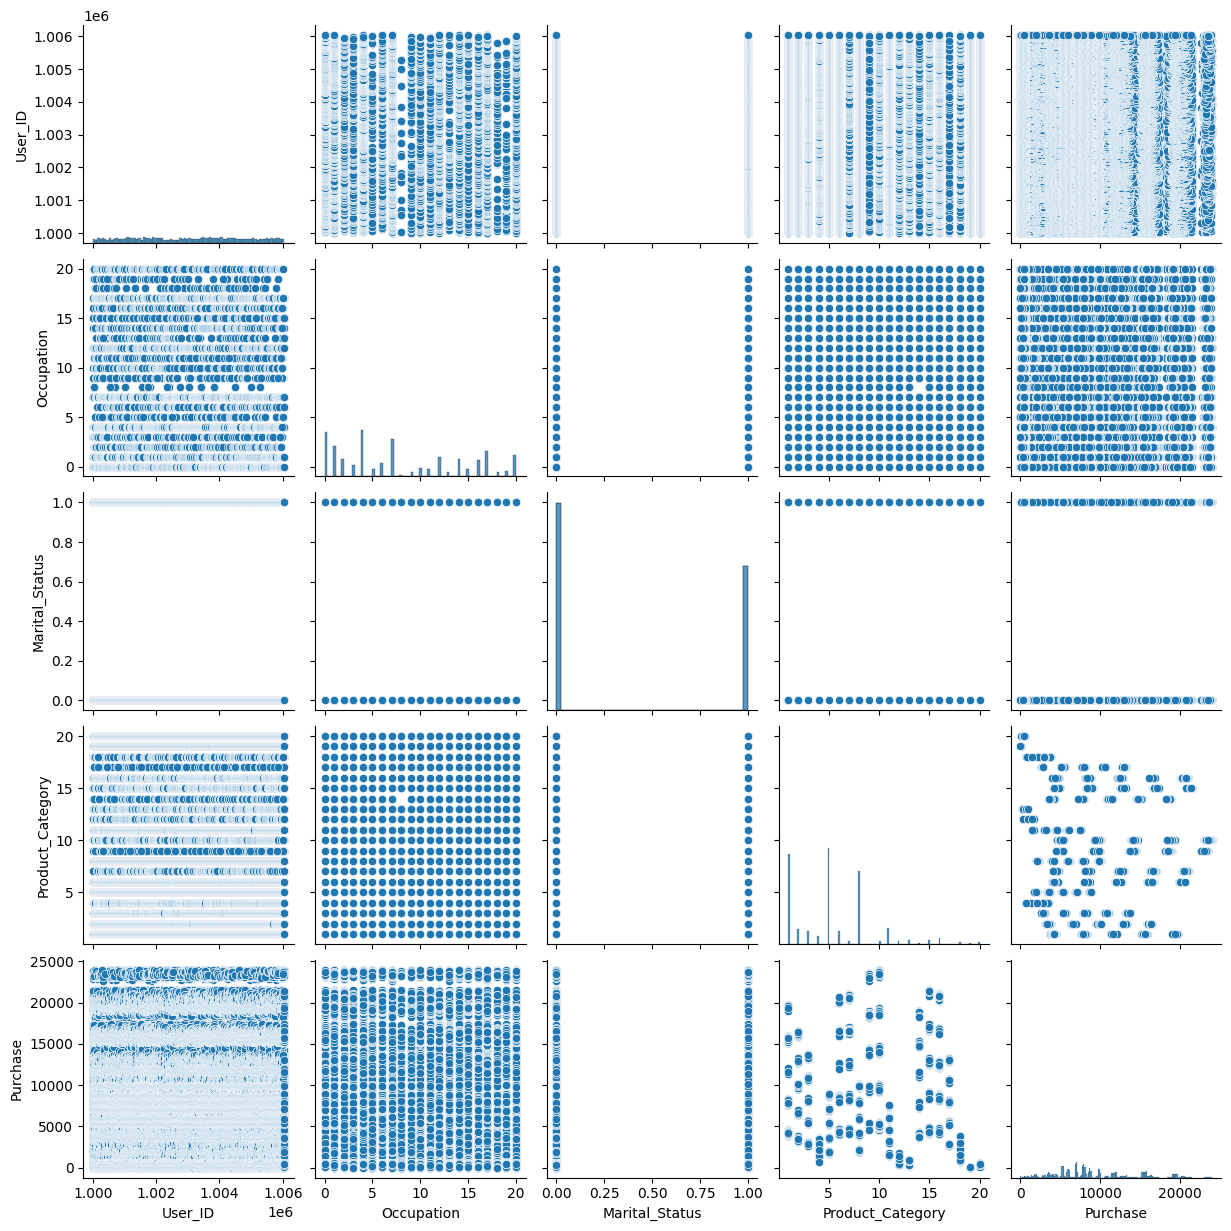

In [ ]:
# Checking the co-relation between each and every variable using pairplot

sns.pairplot(data = df)

In [ ]:
# Checking the co-relation between all the numerical variables.

df1 = df.corr()
df1

<ipython-input-84-e1eb23a039e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = df.corr()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


<Axes: >

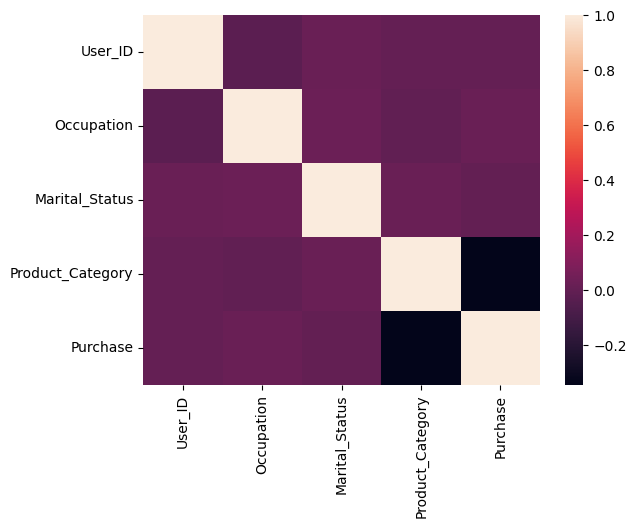

In [ ]:
# Heatmap for depicting co-relation amongst variables: darker block (black) means that attributes are least co-related.

sns.heatmap(data = df1)

In [ ]:
# MISSING VALUES AND OUTLIER DETECTION:


In [ ]:
# Checking whether there are any missing values present or not

df.isna().sum(axis = 0)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
# Checking Outliers

df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
# We can see the mean value of purchase is quite less than maximum value and too large than than the minimum value. Purchase has outliers.
# Lets check it through boxplot.

<Axes: xlabel='Purchase'>

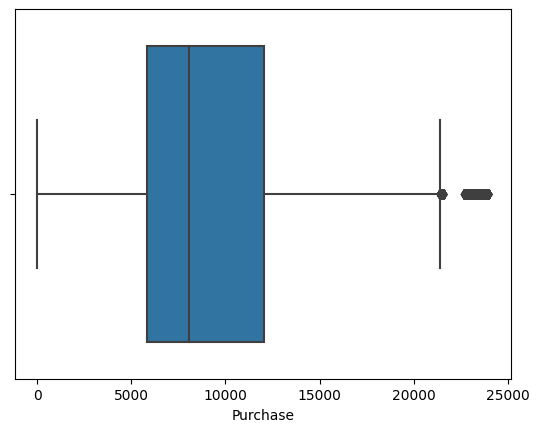

In [ ]:
# Plotting the boxplot for checking outliers : Values after 21000 are considered as outliers

sns.boxplot(data = df,
            x = "Purchase")

In [ ]:
# Checking how many outliers are present in the column : There are 3541 outliers present in purchase column.

df.loc[df["Purchase"]>21000]["Purchase"].count()

3541

In [ ]:
4. #  ANSWERING QUESTIONS

In [ ]:
# 4.1. ARE WOMEN SPENDING MORE MONEY PER TRANSACTION THAN MEN. WHY OR WHY NOT

In [ ]:
df.groupby("Gender")["Purchase"].agg(["min","max","count","sum"])

,min,max,count,sum
Gender,,,,
F,12,23959,135809,1186232642
M,12,23961,414259,3909580100


In [ ]:
# We can see that minimum amount spent by a female and male is same.
# There is not much diffrence in maximum amount spent by a female and male.
# There is a huge diffrence in count and sum of purchases which indicates that males tend to purchase more in black friday sale.

In [ ]:
# Lets seperate our dataframe into female_dataframe and male_dataframe and check the mean of averages for some number of diffrent sub-samples.

df_female = df[df["Gender"] == "F"]
df_female.reset_index()
df_female.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [ ]:
# checking the total number of rows and columns in df_female

df_female.shape

(135809, 10)

In [ ]:
# There are 135809 rows in total and 11 columns.

In [ ]:
# Checking which age group in females tends to purchase more.

pd.crosstab(df["Age"],df["purchase-group"])

purchase-group,10K,12.5K,15K,17.5K,2.5K,20K,22.5K,25K,5K,7.5K
Age,,,,,,,,,,
0-17,3403,1601,630,1577,1381,886,252,56,1797,3519
18-25,22825,11091,3465,11734,6988,5936,1783,262,11642,23934
26-35,51225,24361,7116,26796,14027,12499,4179,816,24327,54241
36-45,26413,12023,4007,13740,7189,6205,2012,546,10994,26884
46-50,11595,4767,1654,5412,3080,2380,819,224,4551,11219
51-55,10078,3987,1409,4731,2549,2318,855,278,3120,9176
55+,6361,2144,672,2473,1630,1145,441,168,1648,4822


In [ ]:
# We can see that frequency of spending 7.5K and 10K is comparable in every age group.
# And frequency of spending 25k is least in every age group.

The mean of samples are :  [8744.05520989036, 8756.687656929953, 8722.926330361022, 8730.22755487486, 8736.20631180555, 8745.339219050284, 8724.575256426304, 8728.300517638743, 8741.11070694873, 8717.127480505711, 8732.88338033562, 8708.693370836985, 8730.010610489731, 8733.97967734097, 8735.652143819629, 8725.061638035771, 8740.502823818746, 8747.792701514627, 8739.360292764102, 8737.333770221414, 8723.42283648359, 8708.711116347224, 8748.25606550376, 8710.23319514907, 8702.606675551693, 8751.05543815211, 8722.332393287632, 8725.531150365587, 8731.802200148739, 8746.042721763653, 8725.692612418912, 8735.319676899175, 8719.40661517278, 8723.990648631534, 8707.941557628728, 8718.216289053009, 8737.524906302233, 8750.022943987511, 8719.4793128585, 8730.61893541665, 8730.779020536194, 8748.244438881076, 8726.043281373104, 8738.851165975746, 8750.137229491418, 8719.601454984573, 8729.90801787805, 8729.873977424177, 8736.057433601602, 8727.765950710189, 8751.868749493775, 8738.255712066211,

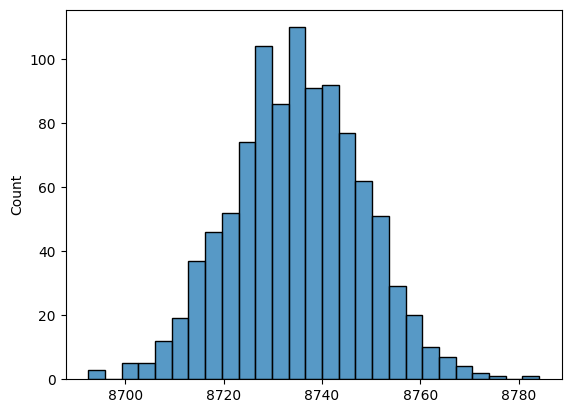

In [ ]:
# A sample of 135809 is given to us for female customers and lets take a 1000 samples.

# sample size = 135809
# number of samples = 1000

sample_size = 135809
number_of_samples = 1000
female_sample_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  female_samples = np.random.choice(df_female["Purchase"],size = sample_size)# selecting 8176 values from df_female
  female_samples_mean = np.mean(female_samples) # calculating the mean of sample
  female_sample_survey.append(female_samples_mean) # Appending the mean into the list

print("The mean of samples are : ",female_sample_survey)
sns.histplot(female_sample_survey)
print("The mean of averages of samples are : ", np.mean(female_sample_survey))



In [ ]:
# We can see that when we have taken 1000 samples , each of size 135809, it is following a normal or guassian distribution.
# We can assume it to be the mean of entire female population i.e 8734.94 because mean of averges of sample for females are 8734.94

In [ ]:
#  CONFIDENCE INTERVAL FOR DF_FEMALES(90%, 95%, 99%)

lower_limit_90 = np.percentile(female_sample_survey,5)
upper_limit_90 = np.percentile(female_sample_survey, 95)

lower_limit_95 = np.percentile(female_sample_survey,2.5)
upper_limit_95 = np.percentile(female_sample_survey, 97.5)

lower_limit_99 = np.percentile(female_sample_survey,0.5)
upper_limit_99 = np.percentile(female_sample_survey, 99.5)

print("The 90% confidence interval is : ", "(",lower_limit_90,upper_limit_90,")")
print("The 95% confidence interval is : ", "(",lower_limit_95,upper_limit_95,")")
print("The 99% confidence interval is : ", "(",lower_limit_99,upper_limit_99,")")




The 90% confidence interval is :  ( 8713.42597471449 8756.32570632285 )
The 95% confidence interval is :  ( 8709.456744582465 8760.256802200149 )
The 99% confidence interval is :  ( 8701.882814246479 8769.170589393929 )


In [ ]:
# Creating a seperate dataframe for males

df_males = df[df["Gender"] == "M"]
df_males = df_males.reset_index()
df_males.head()


,index,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,purchase-group
0,4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,10K
1,5,1000003,P00193542,M,26-35,15,A,3,0,1,15227,17.5K
2,6,1000004,P00184942,M,46-50,7,B,2,1,1,19215,20K
3,7,1000004,P00346142,M,46-50,7,B,2,1,1,15854,17.5K
4,8,1000004,P0097242,M,46-50,7,B,2,1,1,15686,17.5K


In [ ]:
df_males.shape

(414259, 11)

The mean of samples are :  [9434.17448745833, 9434.541139721769, 9436.103507708945, 9448.479014336443, 9432.838835124885, 9446.826065335938, 9440.53682840928, 9432.083182260374, 9443.298170951024, 9426.451070465579, 9445.312031844813, 9432.465554158147, 9441.549144375862, 9431.226635993424, 9443.451777752565, 9436.353648321461, 9431.770715904784, 9430.381500462272, 9428.26492604868, 9433.116506823026, 9437.050731547171, 9437.744688709237, 9430.16778150867, 9427.25051960247, 9435.000280018055, 9444.653458343693, 9431.933857803935, 9426.7978752423, 9449.064471743523, 9449.48995435223, 9431.554706113808, 9429.569124629761, 9438.78830634941, 9443.421110947498, 9432.076164911323, 9446.898807267917, 9431.126824040033, 9442.895010126515, 9452.961565107818, 9434.826543297791, 9440.375757678168, 9438.995954221875, 9429.98877513826, 9440.077816052277, 9453.478514649049, 9428.330602352635, 9439.624020238547, 9442.63750214238, 9439.172136272235, 9429.884152184986, 9442.71039856708, 9444.9517548200

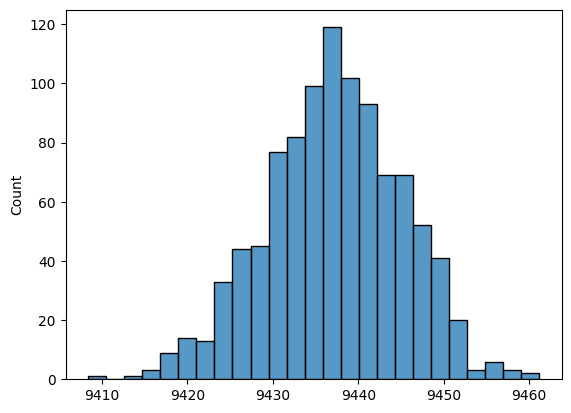

In [ ]:
# A sample of 414259 is given to us for male customers and lets take number of sub-samples be equal to 1000

# sample size = 414259
# number of samples = 1000

sample_size = 414259
number_of_samples = 1000
male_sample_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  male_samples = np.random.choice(df_males["Purchase"],size = sample_size)# selecting random values from df_male
  male_samples_mean = np.mean(male_samples) # calculating the mean of sample
  male_sample_survey.append(male_samples_mean) # Appending the mean into the list

print("The mean of samples are : ",male_sample_survey)
sns.histplot(male_sample_survey)
print("The mean of averages of samples are : ", np.mean(male_sample_survey))


In [ ]:
# We can see that when we have taken 1000 samples , each of size 414259, it is following a normal or guassian distribution.
# We can assume it to be the mean of entire male population i.e 9437.15 because mean of averges of sample for males are 9437.15

In [ ]:
#  CONFIDENCE INTERVAL FOR DF_MALES(90%, 95%, 99%)

lower_limit_90 = np.percentile(male_sample_survey,5)
upper_limit_90 = np.percentile(male_sample_survey, 95)

lower_limit_95 = np.percentile(male_sample_survey,2.5)
upper_limit_95 = np.percentile(male_sample_survey, 97.5)

lower_limit_99 = np.percentile(male_sample_survey,0.5)
upper_limit_99 = np.percentile(male_sample_survey, 99.5)

print("The 90% confidence interval is : ", "(",lower_limit_90,upper_limit_90,")")
print("The 95% confidence interval is : ", "(",lower_limit_95,upper_limit_95,")")
print("The 99% confidence interval is : ", "(",lower_limit_99,upper_limit_99,")")


The 90% confidence interval is :  ( 9424.087740640518 9449.98430317748 )
The 95% confidence interval is :  ( 9420.355861490034 9451.196083368135 )
The 99% confidence interval is :  ( 9417.035615810399 9456.788710758245 )


In [ ]:
# We can see that mean of entire female population is 8734.94 while for male population the mean is 9437.15. we can say that males are spending more
# than females .

In [ ]:
# RESULTS WHEN SAME ACTIVITY IS PERFORMED FOR MARRIED AND UNMARRIED

In [ ]:
# Dataframes for married and unmarried

df_married = df[df['Marital_Status'] == 1]
df_unmarried = df[df['Marital_Status'] == 0]

In [ ]:
# Checking the number of rows for married people

df_married.shape

(225337, 11)

The mean of samples are :  [9266.18810048949, 9270.911212983221, 9258.785521241518, 9253.599839351726, 9251.435037299689, 9246.527263609616, 9277.630211638569, 9244.770619117144, 9272.455113896076, 9267.398815995597, 9254.974930881302, 9258.544029608986, 9281.776219617728, 9267.405122106002, 9283.073050586456, 9280.929607654314, 9277.122505403018, 9251.741547105003, 9251.85898454315, 9234.12970794854, 9253.376831146239, 9240.959846807227, 9275.803347874516, 9261.018700879127, 9269.93549661174, 9259.952231546527, 9267.818454137581, 9270.393468449478, 9249.12872275747, 9242.2909420113, 9263.249066953053, 9249.595046530309, 9265.689935518802, 9256.084504542087, 9259.3963973959, 9266.856597008036, 9285.897797521046, 9255.950514118853, 9240.676111779247, 9243.379507138197, 9261.331938385618, 9271.678383931623, 9268.243825914074, 9276.935940391502, 9259.174569644576, 9259.053240257925, 9244.949178341772, 9246.72031224344, 9255.725761858905, 9254.108508589357, 9289.894029830875, 9269.85483076

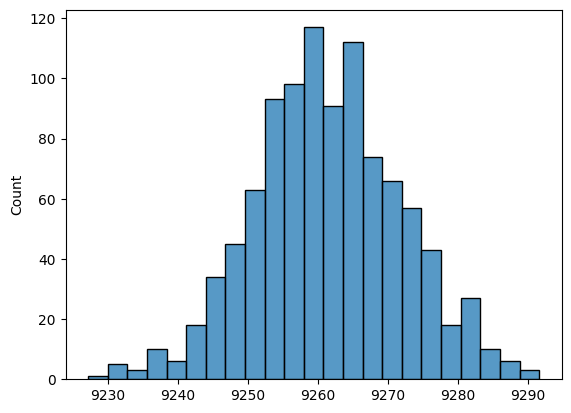

In [ ]:
# Sample size is 225337 for married and lets take a 2000 samples.

# sample size = 225337
# number of samples = 1000

sample_size = 225337
number_of_samples = 1000
married_sample_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  married_samples = np.random.choice(df_married["Purchase"],size = sample_size)# selecting random values from df_male
  married_samples_mean = np.mean(married_samples) # calculating the mean of sample
  married_sample_survey.append(married_samples_mean) # Appending the mean into the list

print("The mean of samples are : ",married_sample_survey)
sns.histplot(married_sample_survey)
print("The mean of averages of samples are : ", np.mean(married_sample_survey))

In [ ]:
# Mean of averages of samples follows a gaussian or normal distribution. So, we may assume that this is the mean of entire population for married people
# Mean of married population is : 9261.43

In [ ]:
# Checking the number of rows and columns in df_unmarried

df_unmarried.shape

(324731, 11)

The mean of samples are :  [9271.78697137015, 9273.886010266959, 9252.829825301556, 9265.526087746473, 9264.821310561665, 9265.88986884529, 9258.970948261793, 9257.192396167906, 9263.97113610958, 9257.153511675819, 9259.221389396147, 9268.60884855465, 9276.570031810945, 9248.33981356877, 9264.394015354246, 9263.621696111552, 9262.35001585928, 9263.852998327846, 9276.29464695394, 9280.68796634753, 9255.151925747772, 9276.481149012567, 9281.748813633438, 9267.352664205142, 9269.210829886892, 9277.719001265663, 9256.167169133836, 9245.471614967466, 9275.649743941909, 9282.456072872625, 9266.201690014197, 9265.100948169407, 9277.487809910357, 9283.891747323169, 9270.900927228999, 9280.788896040107, 9261.118245563252, 9266.037067603647, 9269.927093502007, 9262.068225700657, 9268.85816568175, 9259.649017186533, 9262.45353230828, 9259.383486639712, 9262.801983795818, 9269.528474337221, 9256.337414660135, 9254.421391859723, 9258.620113262978, 9249.73265564421, 9278.909509717274, 9266.032586971

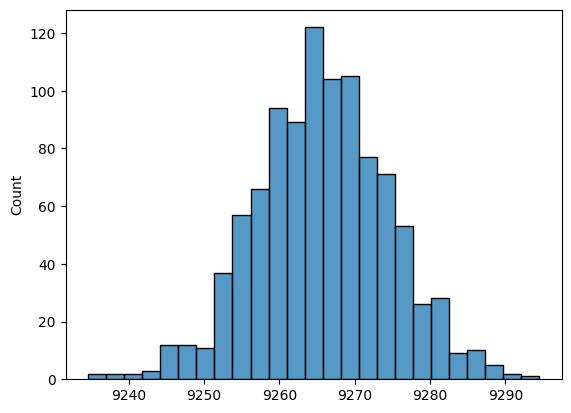

In [ ]:
# Sample size is 324731 for married and lets take a 1000 samples.

# sample size = 324731
# number of samples = 1000

sample_size = 324731
number_of_samples = 1000
unmarried_sample_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  unmarried_samples = np.random.choice(df_unmarried["Purchase"],size = sample_size)# selecting random values from df_male
  unmarried_samples_mean = np.mean(unmarried_samples) # calculating the mean of sample
  unmarried_sample_survey.append(unmarried_samples_mean) # Appending the mean into the list

print("The mean of samples are : ",unmarried_sample_survey)
sns.histplot(unmarried_sample_survey)
print("The mean of averages of samples are : ", np.mean(unmarried_sample_survey))

In [ ]:
# # Mean of averages of samples follows a gaussian or normal distribution. So, we may assume that this is the mean of entire population for unmarried people
# Mean of population is : 9265.65

In [ ]:
#  CONFIDENCE INTERVAL FOR DF_married(90%, 95%, 99%)

lower_limit_90 = np.percentile(married_sample_survey,5)
upper_limit_90 = np.percentile(married_sample_survey, 95)

lower_limit_95 = np.percentile(married_sample_survey,2.5)
upper_limit_95 = np.percentile(married_sample_survey, 97.5)

lower_limit_99 = np.percentile(married_sample_survey,0.5)
upper_limit_99 = np.percentile(married_sample_survey, 99.5)

print("The 90% confidence interval is : ", "(",lower_limit_90,upper_limit_90,")")
print("The 95% confidence interval is : ", "(",lower_limit_95,upper_limit_95,")")
print("The 99% confidence interval is : ", "(",lower_limit_99,upper_limit_99,")")


The 90% confidence interval is :  ( 9244.588570008476 9279.841593923768 )
The 95% confidence interval is :  ( 9241.384955977048 9282.009016051516 )
The 99% confidence interval is :  ( 9232.453766025996 9287.270511922143 )


In [ ]:
#  CONFIDENCE INTERVAL FOR DF_unmarried(90%, 95%, 99%)

lower_limit_90 = np.percentile(unmarried_sample_survey,5)
upper_limit_90 = np.percentile(unmarried_sample_survey, 95)

lower_limit_95 = np.percentile(unmarried_sample_survey,2.5)
upper_limit_95 = np.percentile(unmarried_sample_survey, 97.5)

lower_limit_99 = np.percentile(unmarried_sample_survey,0.5)
upper_limit_99 = np.percentile(unmarried_sample_survey, 99.5)

print("The 90% confidence interval is : ", "(",lower_limit_90,upper_limit_90,")")
print("The 95% confidence interval is : ", "(",lower_limit_95,upper_limit_95,")")
print("The 99% confidence interval is : ", "(",lower_limit_99,upper_limit_99,")")


The 90% confidence interval is :  ( 9251.885567746842 9280.338329879192 )
The 95% confidence interval is :  ( 9247.7340267021 9282.656393291678 )
The 99% confidence interval is :  ( 9241.65621203396 9287.61627764211 )


In [ ]:
# RESULT WHEN THE SAME ACTIVITY IS PERFORMED BY AGE

In [ ]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
#Seperating age into diffrent dataframes

age_0to17 = df.loc[df["Age"]== "0-17"]
age_18to25 = df.loc[df["Age"]== "18-25"]
age_26to35 = df.loc[df["Age"] == "26-35"]
age_36to45 = df.loc[df["Age"] == "36-45"]
age_46to50 = df.loc[df["Age"] == "46-50"]
age_50to55 = df.loc[df["Age"]== "51-55"]
age_55 = df.loc[df["Age"]== "55+"]

In [ ]:
# Checking the number of rows and columns in age group of 0 to 17

age_0to17.shape

(15102, 10)

The mean of samples are :  [8900.129651701762, 8979.456826910344, 8957.971063435307, 8995.258906105151, 8981.73996821613, 8926.380876705072, 8902.424380876704, 8953.032313600848, 8955.68845186068, 8916.966362071249, 8974.370017216263, 8985.391736193882, 8963.521123030063, 8969.280095351609, 8959.966097205668, 8856.447225533042, 8846.586478612104, 8923.939743080387, 8976.53310819759, 8901.96675936962, 8980.860150973382, 8900.665077473182, 9009.681234273607, 8820.094623228711, 9058.574361011786, 8868.840087405642, 9048.353463117468, 9031.878757780427, 8858.018739239837, 8959.965501258112, 8904.036154151769, 8955.987485101312, 8987.270427757912, 8964.571248841214, 8882.772480466163, 8869.106012448683, 8930.825983313469, 8920.852867169911, 8971.058005562178, 8967.960005297311, 8928.107998940537, 8902.045556879884, 8777.788239968217, 8899.816050854191, 8914.339491458086, 9026.185803204873, 8930.264070983976, 9003.741093894849, 8956.38571050192, 8896.629982783737, 8940.764998013508, 8871.992

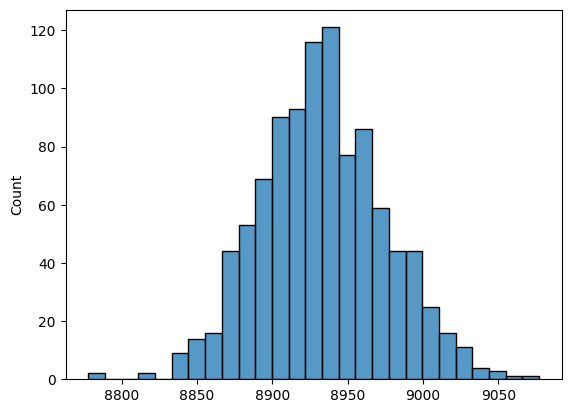

In [ ]:
# Sample size is 15102 for age bracket 0-17  and lets take a 1000 samples.

# sample size = 15102
# number of samples = 1000

sample_size = 15102
number_of_samples = 1000
age_0to17_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  age_0to17_samples = np.random.choice(age_0to17["Purchase"],size = sample_size)# selecting random values
  age_0to17_samples_mean = np.mean(age_0to17_samples) # calculating the mean of sample
  age_0to17_survey.append(age_0to17_samples_mean) # Appending the mean into the list

print("The mean of samples are : ",age_0to17_survey)
sns.histplot(age_0to17_survey)
print("The mean of averages of samples are : ", np.mean(age_0to17_survey))

In [ ]:
# Mean value for the age-group of 0-17 for entire population may be assumed as 8932.05

In [ ]:
# Checking the number of rows and columns in the age group of 18 to 25

age_18to25.shape

(99660, 10)

The mean of samples are :  [9160.13173790889, 9192.125316074655, 9183.026088701585, 9169.343768813967, 9165.900933172787, 9175.130252859723, 9161.863094521374, 9163.464639775235, 9170.115522777443, 9163.515542845675, 9172.482069034719, 9151.539614689946, 9185.511328516957, 9171.957906883403, 9184.846056592414, 9180.218573148706, 9204.257756371664, 9155.56498093518, 9159.709883604255, 9169.54243427654, 9198.142905879991, 9168.107846678708, 9166.694220349187, 9154.654425045153, 9180.427162351996, 9171.002187437287, 9185.485039133053, 9171.614750150511, 9166.041109773229, 9178.191079670882, 9162.511759983945, 9165.907184427051, 9184.24288581176, 9180.662703190848, 9144.372315873972, 9166.1766004415, 9180.783564118, 9155.17079068834, 9196.916355609072, 9176.345344170179, 9185.510686333533, 9155.087688139674, 9140.355839855509, 9182.01462974112, 9184.998926349588, 9146.071101745936, 9165.332199478225, 9155.825145494682, 9176.911719847481, 9179.30525787678, 9160.861549267509, 9164.7918623319

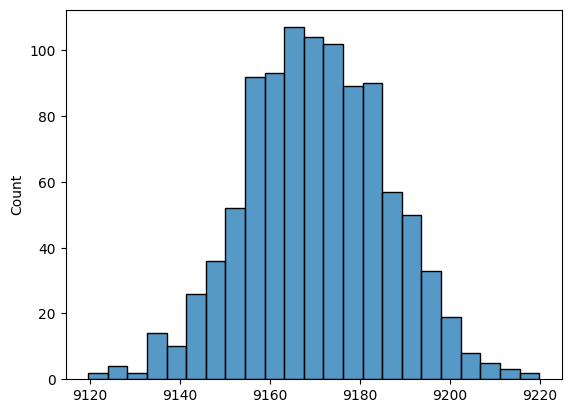

In [ ]:
# Sample size is 99660 for age bracket 18-25  and lets take a 1000 samples.

# sample size = 99660
# number of samples = 1000

sample_size = 99660
number_of_samples = 1000
age_18to25_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  age_18to25_samples = np.random.choice(age_18to25["Purchase"],size = sample_size)# selecting random values
  age_18to25_samples_mean = np.mean(age_18to25_samples) # calculating the mean of sample
  age_18to25_survey.append(age_18to25_samples_mean) # Appending the mean into the list

print("The mean of samples are : ",age_18to25_survey)
sns.histplot(age_18to25_survey)
print("The mean of averages of samples are : ", np.mean(age_18to25_survey))

In [ ]:
# Mean value for the age-group of 18-25 for entire population may be assumed as 9169.63

In [ ]:
# Checking the number of rows in the age bracket of 26 to 35

age_26to35.shape

(219587, 10)

The mean of samples are :  [9261.86081143237, 9258.827298519493, 9268.559126906419, 9243.611238370213, 9268.640438641632, 9255.395943293546, 9239.971642219258, 9243.028822289116, 9250.464685978679, 9273.211050745263, 9262.756233292499, 9241.353144767221, 9251.696726126775, 9249.717815717688, 9248.824124378947, 9250.442503426888, 9254.15796927869, 9237.579915933093, 9239.345207138856, 9252.20029874264, 9242.61618401818, 9249.99079635862, 9244.980713794532, 9253.445937145641, 9247.228943425613, 9259.716718202808, 9263.907608373902, 9276.692677617528, 9260.750618205995, 9264.285485934959, 9255.401080209665, 9237.426350375934, 9261.80270689977, 9244.49932828446, 9228.211178257365, 9241.847021909312, 9262.848406326422, 9248.409382158325, 9258.79407706285, 9255.449211474268, 9270.02211879574, 9248.209657220144, 9249.457946053273, 9253.40744215277, 9243.6953872497, 9239.382659264893, 9253.477068314609, 9240.581013447973, 9247.207043222048, 9251.158588623188, 9253.644446164846, 9254.6878822516

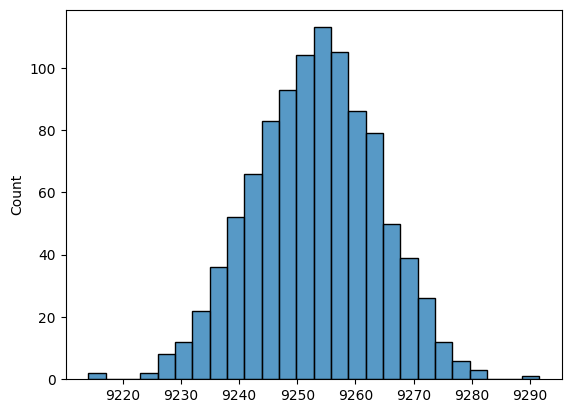

In [ ]:
# Sample size is 219587 for age bracket 26-35  and lets take a 1000 samples.

# sample size = 219587
# number of samples = 1000

sample_size = 219587
number_of_samples = 1000
age_26to35_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  age_26to35_samples = np.random.choice(age_26to35["Purchase"],size = sample_size)# selecting random values
  age_26to35_samples_mean = np.mean(age_26to35_samples) # calculating the mean of sample
  age_26to35_survey.append(age_26to35_samples_mean) # Appending the mean into the list

print("The mean of samples are : ",age_26to35_survey)
sns.histplot(age_26to35_survey)
print("The mean of averages of samples are : ", np.mean(age_26to35_survey))

In [ ]:
# Mean value for the age-group of 26-35 for entire population may be assumed as 9253.15

In [ ]:
# Checking the number of rows and columns in age group of 36 to 45

age_36to45.shape

(110013, 10)

The mean of samples are :  [9317.865379546054, 9323.01704344032, 9347.742766763928, 9320.597229418341, 9326.05210293329, 9333.130920891168, 9334.339468971848, 9343.004799432794, 9326.56147000809, 9363.597647550743, 9384.805268468272, 9315.102751493005, 9322.04562188105, 9323.083435593975, 9305.15982656595, 9331.05432085299, 9303.358194031614, 9301.42986737931, 9341.742930380955, 9319.732713406598, 9321.280275967385, 9325.17393398962, 9344.41440557025, 9336.342423168171, 9300.184332760673, 9341.218665066855, 9312.959613863815, 9318.319671311572, 9320.521592902656, 9311.63993346241, 9334.28727514021, 9357.442684046431, 9327.813722014671, 9337.4060429222, 9336.14699171916, 9313.539099924554, 9354.628362102661, 9349.10860534664, 9313.969158190395, 9355.149091471008, 9334.441775062947, 9352.10045176479, 9338.07502749675, 9334.133047912519, 9347.034032341633, 9329.520393044459, 9345.080499577323, 9333.020306691027, 9315.4735167662, 9341.059974730259, 9346.98857407761, 9325.43490314781, 9350.

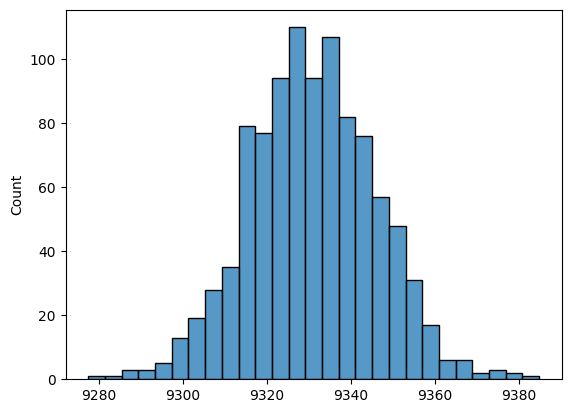

In [ ]:
# Sample size is 110013 for age bracket 36 to 45  and lets take a 1000 samples.

# sample size = 110013
# number of samples = 1000

sample_size = 110013
number_of_samples = 1000
age_36to45_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  age_36to45_samples = np.random.choice(age_36to45["Purchase"],size = sample_size)# selecting random values
  age_36to45_samples_mean = np.mean(age_36to45_samples) # calculating the mean of sample
  age_36to45_survey.append(age_36to45_samples_mean) # Appending the mean into the list

print("The mean of samples are : ",age_36to45_survey)
sns.histplot(age_36to45_survey)
print("The mean of averages of samples are : ", np.mean(age_36to45_survey))

In [ ]:
# Mean value for the age-group of 36-45 for entire population may be assumed as 9331.0044

In [ ]:
# Checking the number of rows and columns for age group of 46 to 50

age_46to50.shape

(45701, 10)

The mean of samples are :  [9193.542373252227, 9189.14776481915, 9222.307170521433, 9178.202774556356, 9169.360189054943, 9228.483687446664, 9235.763550031728, 9179.05365309293, 9223.190696046038, 9233.985558302882, 9222.943852432112, 9203.498019736986, 9184.492089888623, 9207.782871271964, 9176.894685017833, 9229.018205290913, 9204.360823614363, 9230.040940023195, 9253.722303669503, 9220.685192884182, 9185.750114877135, 9221.346338154526, 9170.798647731997, 9196.332640423623, 9198.284545195947, 9156.785584560514, 9199.568280781603, 9196.135336207086, 9198.658125642765, 9205.3854620249, 9207.283057263518, 9216.726833110873, 9194.870462353121, 9202.639745300978, 9235.543948710094, 9229.357213190084, 9210.798122579374, 9228.594078904182, 9194.199623640621, 9211.421303691386, 9163.970569571782, 9214.549747270301, 9237.823001684865, 9261.909279884467, 9219.088400691451, 9194.444454169494, 9217.567580578105, 9182.706461565393, 9202.929695192666, 9171.194372114396, 9220.212249184919, 9192.68

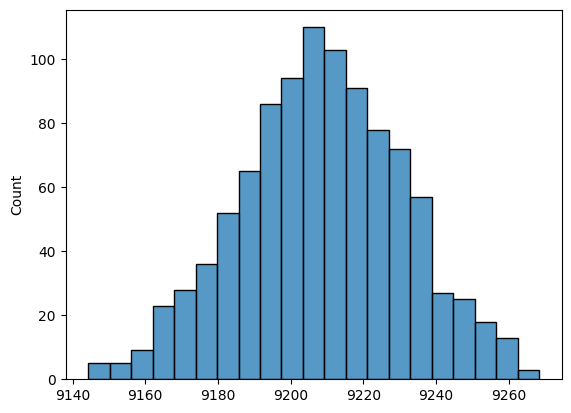

In [ ]:
# Sample size is 45701 for age bracket 46 to 50  and lets take a 1000 samples.

# sample size = 45701
# number of samples = 1000

sample_size = 45701
number_of_samples = 1000
age_46to50_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  age_46to50_samples = np.random.choice(age_46to50["Purchase"],size = sample_size)# selecting random values
  age_46to50_samples_mean = np.mean(age_46to50_samples) # calculating the mean of sample
  age_46to50_survey.append(age_46to50_samples_mean) # Appending the mean into the list

print("The mean of samples are : ",age_46to50_survey)
sns.histplot(age_46to50_survey)
print("The mean of averages of samples are : ", np.mean(age_46to50_survey))

In [ ]:
# Mean value for the age-group of 46 - 50 for entire population may be assumed as 9208.19

In [ ]:
# Checking the number of rows and columns in age bracket of 50 to 55

age_50to55.shape

(38501, 10)

The mean of samples are :  [9491.503103815485, 9536.10765954131, 9513.76130490117, 9521.110516609959, 9513.587205527128, 9503.74769486507, 9539.098620815044, 9537.840549596114, 9486.051635022466, 9518.744292356043, 9533.02072673437, 9528.49001324641, 9536.061842549545, 9513.877613568478, 9561.275836991246, 9554.640736604244, 9502.920859198462, 9541.25926599309, 9575.069400794784, 9532.284512090595, 9499.754681696579, 9552.175761668528, 9506.697462403574, 9510.577984987403, 9505.948157190722, 9515.713565881406, 9502.736396457234, 9549.987195137788, 9513.27762915249, 9541.104283005636, 9523.253863536012, 9589.912262019168, 9482.359003662243, 9525.67104750526, 9525.600737643179, 9591.795797511753, 9489.651411651645, 9525.956182956286, 9522.53998597439, 9563.424846107893, 9558.19612477598, 9521.093036544506, 9534.822705903744, 9513.4627412275, 9498.757876418795, 9519.923378613543, 9557.86041920989, 9545.376094127425, 9545.91270356614, 9544.509337419808, 9512.301784369238, 9531.169268330692

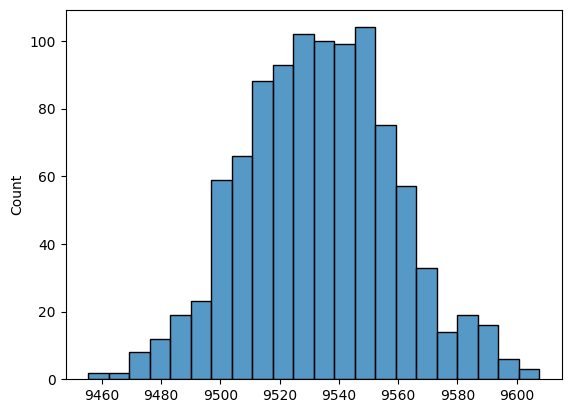

In [ ]:
# Sample size is 38501 for age bracket 50 to 55  and lets take a 1000 samples.

# sample size = 38501
# number of samples = 1000

sample_size = 38501
number_of_samples = 1000
age_50to55_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  age_50to55_samples = np.random.choice(age_50to55["Purchase"],size = sample_size)# selecting random values
  age_50to55_samples_mean = np.mean(age_50to55_samples) # calculating the mean of sample
  age_50to55_survey.append(age_50to55_samples_mean) # Appending the mean into the list

print("The mean of samples are : ",age_50to55_survey)
sns.histplot(age_50to55_survey)
print("The mean of averages of samples are : ", np.mean(age_50to55_survey))

In [ ]:
# Mean value for the age-group of 50 - 55 for entire population may be assumed as 9534.23

In [ ]:
# Checking the number of rows and columns in the age bracket of more than 55

age_55.shape

(21504, 10)

The mean of samples are :  [9360.917976156463, 9327.941300225968, 9336.949767538505, 9341.147580582323, 9364.468195631282, 9386.762291888523, 9338.275525311032, 9312.601828523935, 9298.939637931482, 9308.734110802317, 9306.891015817771, 9306.319965715176, 9335.159995844264, 9335.624373392899, 9352.307888106803, 9374.393184592607, 9289.171164385341, 9345.117087867848, 9351.29505727124, 9348.881691384639, 9346.308589387289, 9321.424092880705, 9272.367704734941, 9294.734915976209, 9339.21103347965, 9355.883977039557, 9354.653255759591, 9334.524246123477, 9365.417080075842, 9297.512480195319, 9354.607854341446, 9329.090387262668, 9358.659021843589, 9331.75159086777, 9332.473442248252, 9338.285057530973, 9324.984753642762, 9356.78003168749, 9273.36749694813, 9296.773408482897, 9326.01277888886, 9379.342978104465, 9382.851822030596, 9285.79457676424, 9337.445572842264, 9335.572374743513, 9391.501649307811, 9328.983636788655, 9327.85169216384, 9316.225682449807, 9342.2284615984, 9340.22051375

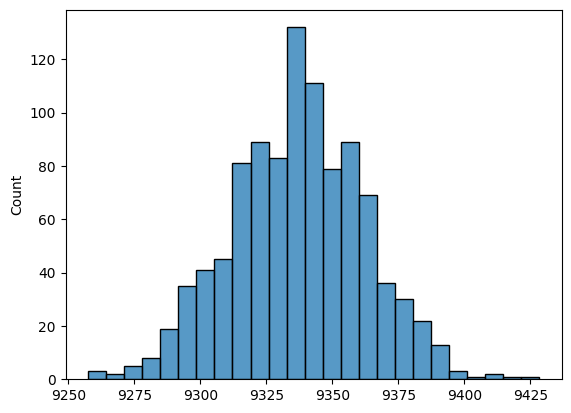

In [ ]:
# Sample size is 21504 for age of greater than 55  and lets take a 1000 samples.

# sample size = 38501
# number of samples = 1000

sample_size = 38501
number_of_samples = 1000
age_55_survey = [] # list which will store the mean of every sample
for sample_number in range(number_of_samples):
  age_55_samples = np.random.choice(age_55["Purchase"],size = sample_size)# selecting random values
  age_55_samples_mean = np.mean(age_55_samples) # calculating the mean of sample
  age_55_survey.append(age_55_samples_mean) # Appending the mean into the list

print("The mean of samples are : ",age_55_survey)
sns.histplot(age_55_survey)
print("The mean of averages of samples are : ", np.mean(age_55_survey))

In [ ]:
# Mean value for the age-group of 55+ for entire population may be assumed as 9334.96

In [ ]:
#  CONFIDENCE INTERVAL FOR agegroup of 0 to 17(90%, 95%, 99%)

lower_limit_90 = np.percentile(age_0to17_survey,5)
upper_limit_90 = np.percentile(age_0to17_survey, 95)

lower_limit_95 = np.percentile(age_0to17_survey,2.5)
upper_limit_95 = np.percentile(age_0to17_survey, 97.5)

lower_limit_99 = np.percentile(age_0to17_survey,0.5)
upper_limit_99 = np.percentile(age_0to17_survey, 99.5)

print("The 90% confidence interval is : ", "(",lower_limit_90,upper_limit_90,")")
print("The 95% confidence interval is : ", "(",lower_limit_95,upper_limit_95,")")
print("The 99% confidence interval is : ", "(",lower_limit_99,upper_limit_99,")")


The 90% confidence interval is :  ( 8868.472831413057 9003.554767580454 )
The 95% confidence interval is :  ( 8854.174607667857 9015.536579592106 )
The 99% confidence interval is :  ( 8837.50657826778 9043.192666534234 )


In [ ]:
#  CONFIDENCE INTERVAL FOR agegroup of 18 to 25(90%, 95%, 99%)

lower_limit_90 = np.percentile(age_18to25_survey,5)
upper_limit_90 = np.percentile(age_18to25_survey, 95)

lower_limit_95 = np.percentile(age_18to25_survey,2.5)
upper_limit_95 = np.percentile(age_18to25_survey, 97.5)

lower_limit_99 = np.percentile(age_18to25_survey,0.5)
upper_limit_99 = np.percentile(age_18to25_survey, 99.5)

print("The 90% confidence interval is : ", "(",lower_limit_90,upper_limit_90,")")
print("The 95% confidence interval is : ", "(",lower_limit_95,upper_limit_95,")")
print("The 99% confidence interval is : ", "(",lower_limit_99,upper_limit_99,")")


The 90% confidence interval is :  ( 9144.370309050773 9196.232499498294 )
The 95% confidence interval is :  ( 9138.918167770418 9200.58106311459 )
The 99% confidence interval is :  ( 9127.585777292796 9210.509621713827 )


In [ ]:
#  CONFIDENCE INTERVAL FOR agegroup of 26 to 35(90%, 95%, 99%)

lower_limit_90 = np.percentile(age_26to35_survey,5)
upper_limit_90 = np.percentile(age_26to35_survey, 95)

lower_limit_95 = np.percentile(age_26to35_survey,2.5)
upper_limit_95 = np.percentile(age_26to35_survey, 97.5)

lower_limit_99 = np.percentile(age_26to35_survey,0.5)
upper_limit_99 = np.percentile(age_26to35_survey, 99.5)

print("The 90% confidence interval is : ", "(",lower_limit_90,upper_limit_90,")")
print("The 95% confidence interval is : ", "(",lower_limit_95,upper_limit_95,")")
print("The 99% confidence interval is : ", "(",lower_limit_99,upper_limit_99,")")


The 90% confidence interval is :  ( 9235.72548557064 9270.514346250005 )
The 95% confidence interval is :  ( 9232.13915270485 9273.469896100407 )
The 99% confidence interval is :  ( 9227.557426145446 9278.036012081771 )


In [ ]:
#  CONFIDENCE INTERVAL FOR agegroup of 36 to 45(90%, 95%, 99%)

lower_limit_90 = np.percentile(age_36to45_survey,5)
upper_limit_90 = np.percentile(age_36to45_survey, 95)

lower_limit_95 = np.percentile(age_36to45_survey,2.5)
upper_limit_95 = np.percentile(age_36to45_survey, 97.5)

lower_limit_99 = np.percentile(age_36to45_survey,0.5)
upper_limit_99 = np.percentile(age_36to45_survey, 99.5)

print("The 90% confidence interval is : ", "(",lower_limit_90,upper_limit_90,")")
print("The 95% confidence interval is : ", "(",lower_limit_95,upper_limit_95,")")
print("The 99% confidence interval is : ", "(",lower_limit_99,upper_limit_99,")")


The 90% confidence interval is :  ( 9306.21682937471 9354.998831956224 )
The 95% confidence interval is :  ( 9300.993059911101 9359.470678465272 )
The 99% confidence interval is :  ( 9292.559249770482 9373.038425367911 )


In [ ]:
#  CONFIDENCE INTERVAL FOR agegroup of 46 to 50 (90%, 95%, 99%)

lower_limit_90 = np.percentile(age_46to50_survey,5)
upper_limit_90 = np.percentile(age_46to50_survey, 95)

lower_limit_95 = np.percentile(age_46to50_survey,2.5)
upper_limit_95 = np.percentile(age_46to50_survey, 97.5)

lower_limit_99 = np.percentile(age_46to50_survey,0.5)
upper_limit_99 = np.percentile(age_46to50_survey, 99.5)

print("The 90% confidence interval is : ", "(",lower_limit_90,upper_limit_90,")")
print("The 95% confidence interval is : ", "(",lower_limit_95,upper_limit_95,")")
print("The 99% confidence interval is : ", "(",lower_limit_99,upper_limit_99,")")


The 90% confidence interval is :  ( 9170.196108400254 9246.831063871688 )
The 95% confidence interval is :  ( 9164.197801470427 9253.645734776044 )
The 99% confidence interval is :  ( 9150.566653793134 9260.645033587887 )


In [ ]:
#  CONFIDENCE INTERVAL FOR agegroup of 51 to 55(90%, 95%, 99%)

lower_limit_90 = np.percentile(age_50to55_survey,5)
upper_limit_90 = np.percentile(age_50to55_survey, 95)

lower_limit_95 = np.percentile(age_50to55_survey,2.5)
upper_limit_95 = np.percentile(age_50to55_survey, 97.5)

lower_limit_99 = np.percentile(age_50to55_survey,0.5)
upper_limit_99 = np.percentile(age_50to55_survey, 99.5)

print("The 90% confidence interval is : ", "(",lower_limit_90,upper_limit_90,")")
print("The 95% confidence interval is : ", "(",lower_limit_95,upper_limit_95,")")
print("The 99% confidence interval is : ", "(",lower_limit_99,upper_limit_99,")")


The 90% confidence interval is :  ( 9491.50260512714 9574.447796161137 )
The 95% confidence interval is :  ( 9484.015880756344 9586.505002467467 )
The 99% confidence interval is :  ( 9472.918747694866 9596.132722656554 )


In [ ]:
#  CONFIDENCE INTERVAL FOR agegroup of 55+ (90%, 95%, 99%)

lower_limit_90 = np.percentile(age_55_survey,5)
upper_limit_90 = np.percentile(age_55_survey, 95)

lower_limit_95 = np.percentile(age_55_survey,2.5)
upper_limit_95 = np.percentile(age_55_survey, 97.5)

lower_limit_99 = np.percentile(age_55_survey,0.5)
upper_limit_99 = np.percentile(age_55_survey, 99.5)

print("The 90% confidence interval is : ", "(",lower_limit_90,upper_limit_90,")")
print("The 95% confidence interval is : ", "(",lower_limit_95,upper_limit_95,")")
print("The 99% confidence interval is : ", "(",lower_limit_99,upper_limit_99,")")


The 90% confidence interval is :  ( 9295.23359652996 9378.178933014728 )
The 95% confidence interval is :  ( 9287.79562868497 9385.730186228928 )
The 99% confidence interval is :  ( 9271.212343445626 9395.469737279553 )


In [ ]:
# COMMENT ON THE RANGE OF ATTRIBUTES

# 1. There are 550068 rows and 10 columns
# 2. Column names are User_ID, Product_ID, Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,
#.    Marital_Status, Product_Category and Purchase.
# 3. User_id, Occupation,Marital_Status,Product_Category and Purchase are of integer data types.
# 4. Product_id,Gender,Age,City_Category,Stay_In_Current_City_Years are of String or Object data types.
# 5. Occupation and Marital_Status are given in masked form.
# 6. Statistics of the Purchase columns:
#    - Mean               :   9263.9687
#    - Standard deviation :   5023.0653
#    - Minimum value      :   12
#    - Maximum value      :   23961
# 7. There are 5891 unique User_id who did the purchase during black friday sale.
# 8. There are 3631 unique product_ids.
# 9. There are only 2 genders presents : Male and Female.
# 10. There are only two values present in Marital Status column 0 and 1. We are assuming that 0 represents unmarried, 1 represents married.
# 11. A total of 18105 purchases has been done.
# 12. Maximum amount spent in the purchase was 23961$ and minimum amount was 12$. The units of money is not mentioned , since its an American multinational
#.    organization, we are assuming the unit to be $.
# 13. There are 7 age groups who made the puchase and they are been categorized into bins . Bins are :
#.        0 -17
          18-25
          26-35
          36-45
          45-50
          50-55
          55+
# 14. Occupation is present in masked form , maximum number of people purchasing items are from with mask 4.
# 15. A total number of 18105 unique purchases have been made.

In [ ]:
# Comment on the distribution of variables:

# 1. User with userid = 1001680 made the highest number of purchases i.e 1026.
# 2. User with userid = 1000708 made the lowest number of purchases i.e 6.
# 3. Most sold out product is P00265242 with 1880 units sold out.
# 4. Least sold products were P00314842, P00298842 , P00231642, P00204442  and P00066342 with only a single unit sold
# 5. There are approximately 414259 Males and 135809 who did the purchase on black friday sale.
# 6. Maximum number of purchases were made in the age bracket of 26 - 35 i.e 219587.
# 7. Two age groups i.e minors and senior citizens made the minimum purchase.
# 8. Since, occupation is masked, we can only say that maximum number of people are doing the job with mask 4.
# 9. We have assumed that 0 represents single and 1 represents married, so, there are 324731 single people doing purchase and 225337 married people doing
#.   purchase.
# 10. 7011$ were spent my maximum customers i.e 191 which represents a amount close to the median.

In [ ]:
# Comment on each univariate and bivariate plot

# 1. Age group of 26 - 35 is present mostly and age group of 0 -17 is present least.
# 2. Females are too less as compared to Males.
# 3. There are 20 product categories whereas the product category 5 is most purchased and product category 9 is least purchased.
# 4. There is not much difference in selling units of product categories 18,20,19,14,7,9.
# 5. If we assume 0 as unmarried and 1 as married, then unmarried people are more inclined towards purchasing more.
# 6. Most of the customers  who did the shopping on Black Friday are from City B, then city C and then city A.
# 7. Most of the customers purchasing during the Black Friday sale are from occupation mask 4.

In [ ]:
# Following Questions can be answered :

# 1. Which Userid made the highest purchase.
# 2. Which userid made the lowest purchase.
# 3. Which is the most sold productid
# 4. Which is the least sold product.
# 5. Which age group made the highest purchase.
# 6. What are the reasons for the minors and senior citizen to purchase less during festive season sale.
# 7. Which user made the highest purchase.

In [ ]:
# Buisness Insights :

# 1. Since, maximum number of purchases were made in the age bracket of 26- 35, so we may assume that they may be drawing a handsome salary with
#    least responsibility.
# 2. Least purchases, were made in the group of 0 - 17, we may assume that they may be dependent on some other source for finances.
# 3. Number of males who purchased during the sale is approximately 2.5 times more than females, we may assume that Males tend to purchase more
#    during festive sale or dependent females may be using the males account or credit card for the purchase.
# 4. Age groups making purchases follows a guassian distribution. We can see that minimum number of purchases were made by age group of 0 - 17 followed by
#.   18 - 25 and then maximum sales by 26 - 35 . After this the curve has started declining towards the age group of 36 - 45 which is followed by 46 - 50
#.   51 - 55 and 55+.
# 5. Most of the people doing shopping are from city B, we may assume that city B may be metropolitan city where people are earning more than
#     city c and  city a and hence more spending.
# 6. People with occupation with mask 4 are the ones who are purchasing more, we may assume that they are from highest earning brackets and people with
#.    occupation mask 3 is least purchasing during the sale, we may assume that they are from lowest earning bracket.
# 7. We can see that minimum amount spent by a female and male is same.
# 8. There is not much diffrence in maximum amount spent by a female and male.
# 9. There is a huge diffrence in count and sum of purchases which indicates that males tend to purchase more in black friday sale.
#.10. We can assume  the mean of entire female population  8734.94 because mean of averages of samples for females are 8734.94.
# 11. We can assume  the mean of entire male population  9437.15 because mean of averges of sample for males are 9437.15.
# 12. We can see that mean of entire female population is 8734.94 while for male population the mean is 9437.15. we can say that males are spending more
#     than females .
# 13. Mean of married population is : 9261.43 and for unmarried population is 9265.65.
# 14. Mean value for the age-group of 0-17 for entire population may be assumed as 8932.05.
# 15. Mean value for the age-group of 18-25 for entire population may be assumed as 9169.63.
# 16. Mean value for the age-group of 26-35 for entire population may be assumed as 9253.15.
# 17. Mean value for the age-group of 36-45 for entire population may be assumed as 9331.0044.
# 18. Mean value for the age-group of 46 - 50 for entire population may be assumed as 9208.19.
# 19. Mean value for the age-group of 50 - 55 for entire population may be assumed as 9534.23.
# 20. Mean value for the age-group of 55+ for entire population may be assumed as 9334.96.



In [ ]:
# Recommendations:

# 1. Walmart shall open more retail stores in city B.
# 2. Walmart shall give some attractive discount to married people , so that they can also purchase more.
# 3. Since, most of the people purchasing in sale are from occupation mask 4 , we may assume the following that either the occupation from mask 4
#.   may be in finance , technology or investment banking. If this assumption is correct, walmart shall give discount on the products which are
#    useful for their professional lives as well such as technology gagdets.
# 4. By looking at the statistical figure or mean purchase of females and males, females are purchasing less than the males. Walmart shall plan a strategy
#     to attract female customers and their beauty products.
